In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.nn import CrossEntropyLoss, NLLLoss
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from torchinfo import summary

from os.path import exists

from util import test_loss, train_NN

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


In [3]:
batch_size = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=True,
                                        download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=False,
                                       download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

input_shape = (batch_size, 3, 32, 32)
num_labels = 10

Files already downloaded and verified
Files already downloaded and verified


In [16]:
from Models import VGGNet

VGGNN = VGGNet(input_shape, num_labels, device)

summary(VGGNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
VGGNet                                   [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 32, 32, 32]         896
│    └─ReLU: 2-2                         [100, 32, 32, 32]         --
│    └─Conv2d: 2-3                       [100, 32, 32, 32]         9,248
│    └─ReLU: 2-4                         [100, 32, 32, 32]         --
│    └─MaxPool2d: 2-5                    [100, 32, 16, 16]         --
│    └─Conv2d: 2-6                       [100, 64, 16, 16]         18,496
│    └─ReLU: 2-7                         [100, 64, 16, 16]         --
│    └─Conv2d: 2-8                       [100, 64, 16, 16]         36,928
│    └─ReLU: 2-9                         [100, 64, 16, 16]         --
│    └─MaxPool2d: 2-10                   [100, 64, 8, 8]           --
│    └─Conv2d: 2-11                      [100, 128, 8, 8]          73,856

In [17]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(VGGNN.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1)

In [18]:
stats = train_NN(VGGNN, train_dataloader,
        test_dataloader, epochs=10, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 2.303
test_loss: 2.302, test_accuracy: 10.0
[1,   400] train_loss: 2.302
test_loss: 2.300, test_accuracy: 15.42


KeyboardInterrupt: 

In [4]:
from Models import Cifar10_Conv_Net

Cifar10_Conv_NN = Cifar10_Conv_Net(input_shape, num_labels, device=device)

summary(Cifar10_Conv_NN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
Cifar10_Conv_Net                         [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 32, 32]          456
│    └─BatchNorm2d: 2-2                  [100, 6, 32, 32]          12
│    └─Tanh: 2-3                         [100, 6, 32, 32]          --
│    └─AvgPool2d: 2-4                    [100, 6, 16, 16]          --
│    └─Conv2d: 2-5                       [100, 16, 16, 16]         2,416
│    └─BatchNorm2d: 2-6                  [100, 16, 16, 16]         32
│    └─Tanh: 2-7                         [100, 16, 16, 16]         --
│    └─AvgPool2d: 2-8                    [100, 16, 8, 8]           --
│    └─Conv2d: 2-9                       [100, 32, 8, 8]           4,640
│    └─BatchNorm2d: 2-10                 [100, 32, 8, 8]           64
│    └─Tanh: 2-11                        [100, 32, 8, 8]           --
│    └─F

In [6]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(Cifar10_Conv_NN.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

In [11]:
leDepthStats = train_NN(Cifar10_Conv_NN, train_dataloader,
        test_dataloader, epochs=4, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.777
test_loss: 1.125, test_accuracy: 61.79
[1,   400] train_loss: 0.782
test_loss: 1.126, test_accuracy: 61.79
[2,   200] train_loss: 0.775
test_loss: 1.126, test_accuracy: 61.85
[2,   400] train_loss: 0.777
test_loss: 1.127, test_accuracy: 61.96
[3,   200] train_loss: 0.772
test_loss: 1.127, test_accuracy: 61.85
[3,   400] train_loss: 0.778
test_loss: 1.127, test_accuracy: 61.9
[4,   200] train_loss: 0.768
test_loss: 1.127, test_accuracy: 61.91
[4,   400] train_loss: 0.771
test_loss: 1.127, test_accuracy: 61.83


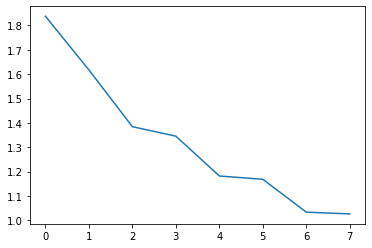

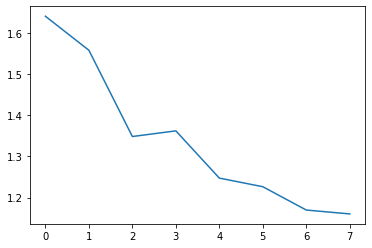

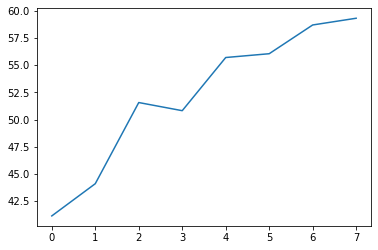

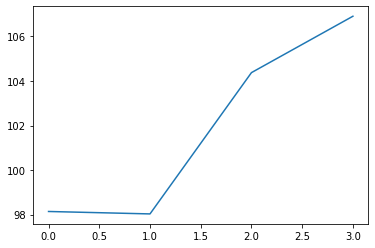

In [9]:
plt.plot(leDepthStats[0])
plt.show()
plt.plot(leDepthStats[1])
plt.show()
plt.plot(leDepthStats[2])
plt.show()
plt.plot(leDepthStats[3])
plt.show()

In [8]:
torch.save(Cifar10_Conv_NN.state_dict(), "./models/Cifar/Cifar10_Conv_NN.pth")

In [20]:
from Models import Cifar10_ASL_Net

expansion_rate = 3

Cifar10_ASL_NN = Cifar10_ASL_Net(input_shape, num_labels, expansion_rate, device)

summary(Cifar10_ASL_NN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
Cifar10_ASL_Net                          [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 32, 32]          456
│    └─BatchNorm2d: 2-2                  [100, 6, 32, 32]          12
│    └─Tanh: 2-3                         [100, 6, 32, 32]          --
│    └─AvgPool2d: 2-4                    [100, 6, 16, 16]          --
│    └─CSC_block: 2-5                    [100, 16, 16, 16]         --
│    │    └─Sequential: 3-1              --                        502
│    └─Tanh: 2-6                         [100, 16, 16, 16]         --
│    └─AvgPool2d: 2-7                    [100, 16, 8, 8]           --
│    └─CSC_block: 2-8                    [100, 32, 8, 8]           --
│    │    └─Sequential: 3-2              --                        2,576
│    └─Tanh: 2-9                         [100, 32, 8, 8]           --
│    └─Fla

In [21]:
criterion = CrossEntropyLoss()
Cifar10_ASL_NN_optimizer = optim.SGD(Cifar10_ASL_NN.parameters(), lr=0.1, momentum=0.9)
scheduler_Cifar = optim.lr_scheduler.ExponentialLR(Cifar10_ASL_NN_optimizer, gamma=0.8)

In [23]:
leASLStats = train_NN(Cifar10_ASL_NN, train_dataloader,
        test_dataloader, epochs=6, optimizer=Cifar10_ASL_NN_optimizer, criterion=criterion,
        scheduler=scheduler_Cifar, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.707
test_loss: 1.035, test_accuracy: 64.55
[1,   400] train_loss: 0.715
test_loss: 1.038, test_accuracy: 64.73
[2,   200] train_loss: 0.687
test_loss: 1.037, test_accuracy: 65.08
[2,   400] train_loss: 0.683
test_loss: 1.037, test_accuracy: 65.0
[3,   200] train_loss: 0.681
test_loss: 1.037, test_accuracy: 65.11
[3,   400] train_loss: 0.666
test_loss: 1.038, test_accuracy: 65.04
[4,   200] train_loss: 0.672
test_loss: 1.038, test_accuracy: 65.02


KeyboardInterrupt: 

In [ ]:
torch.save(Cifar10_ASL_Net.state_dict(), "./models/Cifar/Cifar10_ALS_NN.pth")

In [6]:
PATH = "models/Cifar/Cifar10.pth"

if exists(PATH):
    NN_cif.load_state_dict(torch.load(PATH))
    NN_cif.eval()

In [9]:
%%timeit
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer_Cifar.zero_grad()

        # forward + backward + optimize
        outputs = NN_cif(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_Cifar.step()

        # print statistics
        running_loss += loss.item()
        if i % 250 == 249:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] train_loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            print(test_loss(NN_cif, test_dataloader, criterion, device))

    scheduler_Cifar.step()

[1,   244] train_loss: 4.071
(1.4727221763134002, 47.23)


In [10]:
torch.save(NN_cif.state_dict(), "./models/Cifar/Cifar10.pth")

In [8]:
from Models import Cifar10_Net

criterion = CrossEntropyLoss()


input_shape = (100, 3, 32, 32)
num_labels = 10
expansion_rate = 3

NN2_cif = Cifar10_Net(input_shape, num_labels, expansion_rate)


PATH = "models/Cifar/Cifar10.pth"

if exists(PATH):
    NN2_cif.load_state_dict(torch.load(PATH))
    NN2_cif.eval()

print(test_loss(NN2_cif, test_dataloader, criterion))

(1.413678903579712, 49.93)
